We were trying to explore the techniques of clustering.
We have used the KMeans clustering algorithm to cluster the data.

Moving window of 50, while overlap of 50% was used to extract the features from the data.

In [2]:
import sktime as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler

from sktime.datasets import load_arrow_head
from sktime.clustering.k_means import TimeSeriesKMeans

In [32]:
data_ent = pd.read_csv("/Users/tejasmacipad/Desktop/Final_inter_IIT_submission/ETH/ETHUSDT_15m.csv")
data_ent = data_ent.drop(columns=['datetime'], errors='ignore')

In [4]:
#print columns

print(data_ent.columns)

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [28]:
data_ent

,Unnamed: 0,open,high,low,close,volume
0,0,151.38,151.38,145.70,147.09,69972.978
1,1,147.05,148.64,146.39,146.79,62459.238
2,2,146.77,148.28,145.50,147.20,68504.046
3,3,147.21,152.50,147.21,149.41,65606.928
4,4,149.49,150.55,148.98,150.06,59505.894
...,...,...,...,...,...,...
8948,8948,2296.95,2318.00,2291.43,2310.66,324174.135
8949,8949,2310.66,2324.78,2291.86,2300.60,358689.484
8950,8950,2300.59,2311.74,2292.56,2296.86,226419.616
8951,8951,2296.85,2296.91,2258.00,2283.85,360287.848


In [30]:
data_ent = data_ent.drop(columns=["date"], errors="ignore")

# Convert DataFrame to numpy array
data = np.array(data_ent)
print("Total data points:", len(data))

X_train = data[:int(len(data) * 0.7)]
X_test = data[int(len(data) * 0.7):]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1])

kmeans = TimeSeriesKMeans(n_clusters=6, metric="dtw", random_state=42)
labels_train = kmeans.fit_predict(X_train_reshaped)

print("Cluster labels for training data:", labels_train)
print("Total clusters assigned:", len(labels_train))

Total data points: 8953
(6267, 6)
(6267, 6)


In [33]:
data_close = data_ent[["close"]]
data_close = np.array(data_close)
print(np.shape(data_close))

lst = []
#make a list containing list of 20 elements in each of the list from this data_close;

for a in range(0, len(data_close) - 50, 25):
    lst.append(data_close[a:a+50])

lst = lst[:-1] #to handle the last cpol
print(np.shape(lst))

(143233, 1)
(5727, 50, 1)


In [34]:
lst = np.array(lst)
X = lst.squeeze(axis=-1)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = TimeSeriesKMeans(n_clusters=20, metric="dtw", random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Output results
print("Cluster labels:", labels)
print("Total clusters assigned:", len(labels))

Cluster labels: [ 4  4  4 ... 11 11 11]
Total clusters assigned: 5727


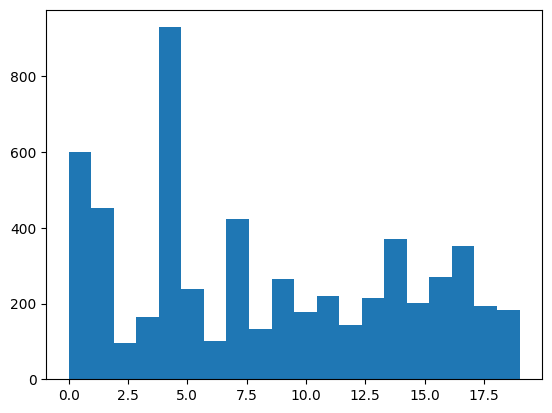

In [39]:
plt.hist(labels, bins = 20)
plt.show()

In [40]:
kmeans.cluster_centers_[0, 0].shape

(50,)

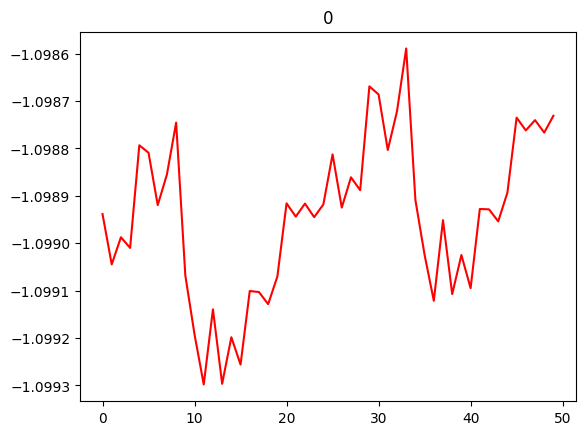

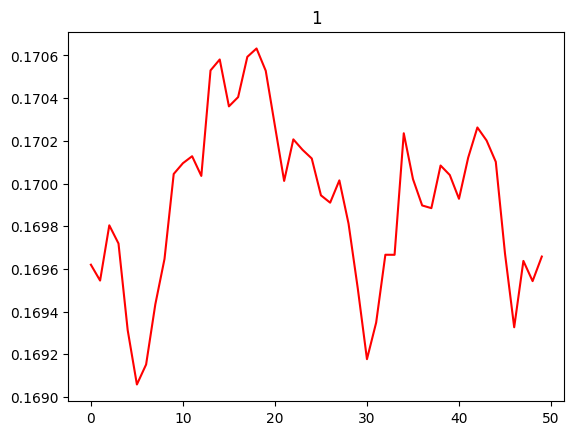

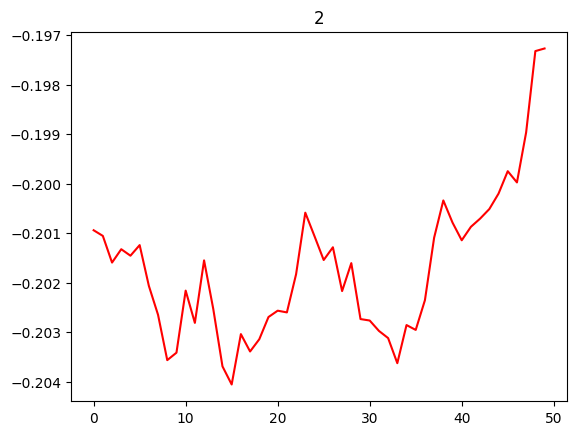

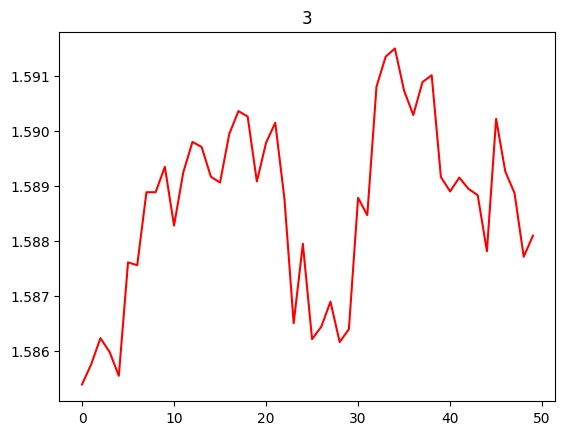

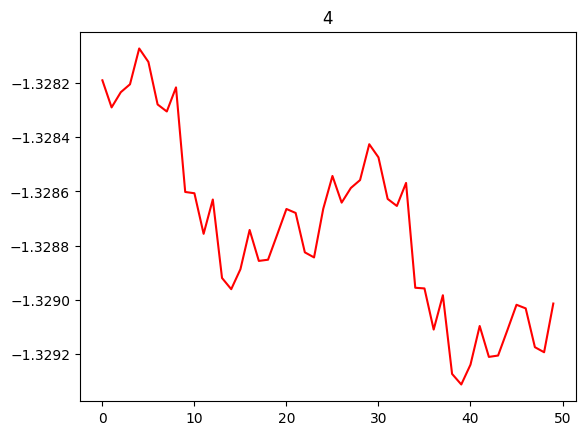

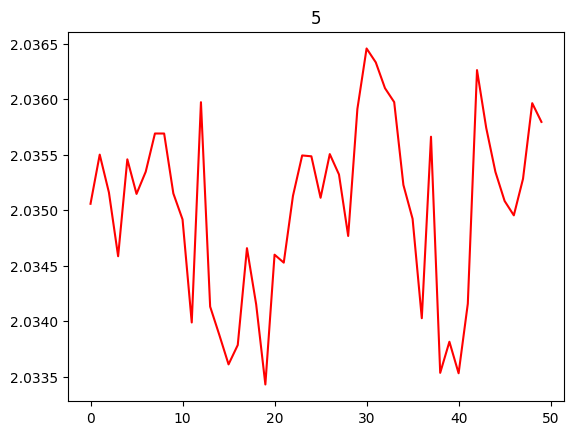

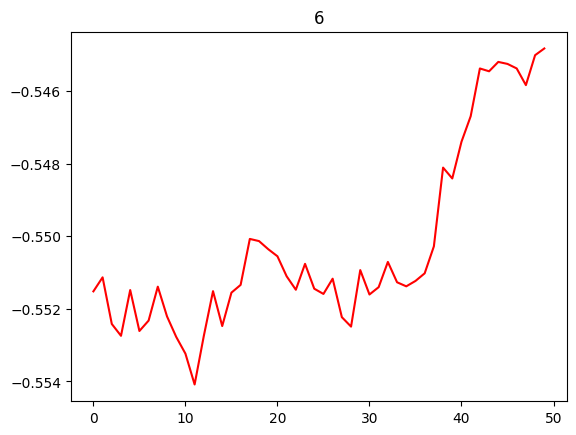

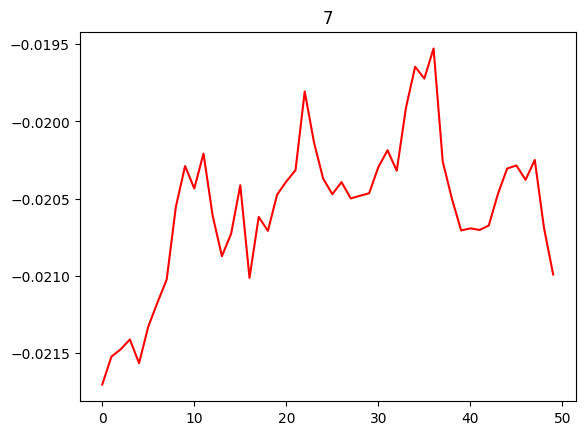

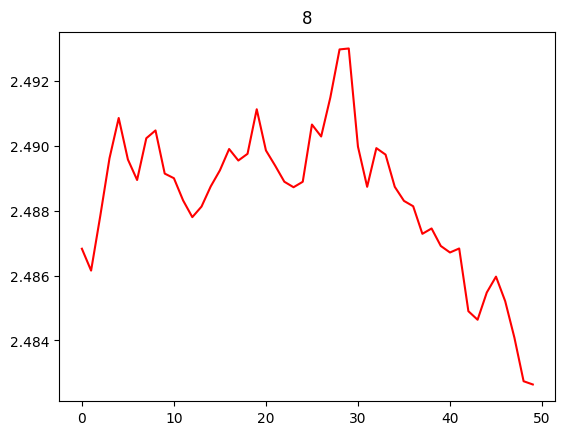

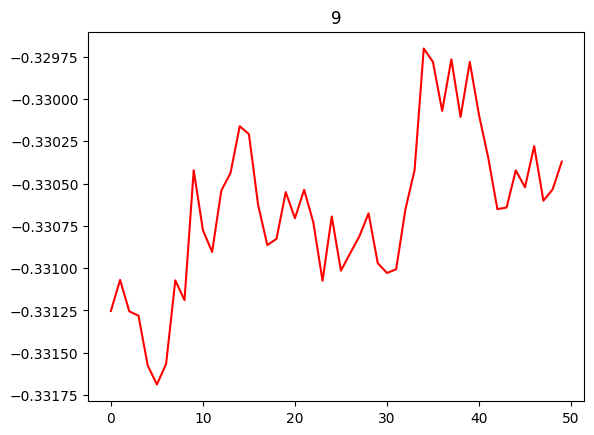

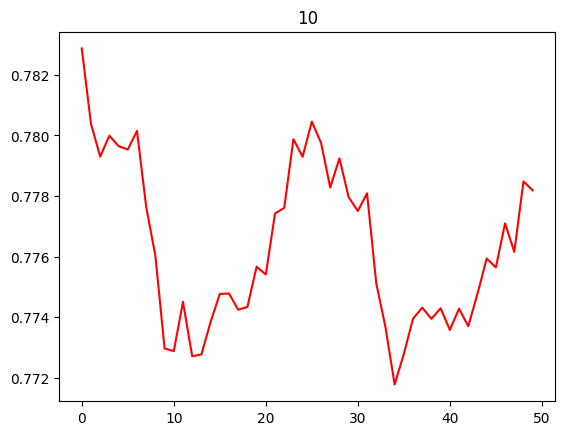

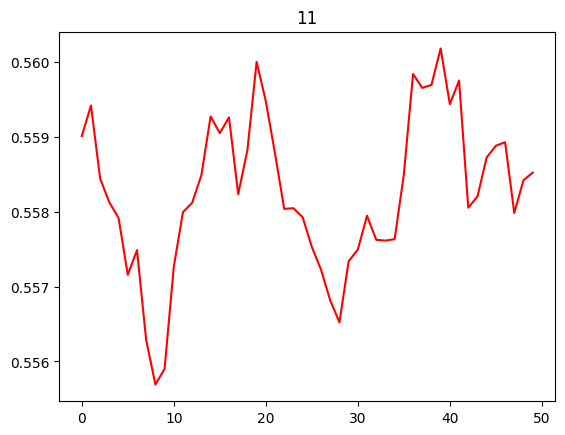

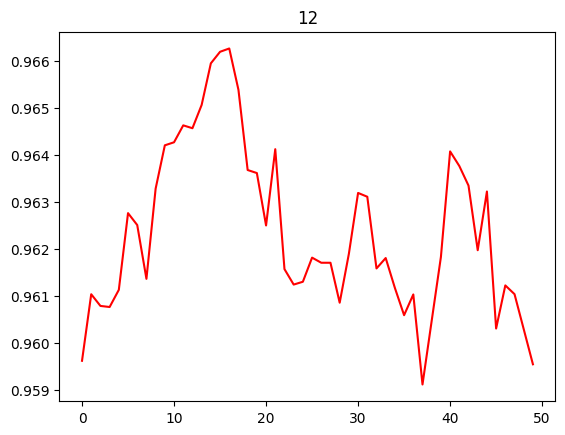

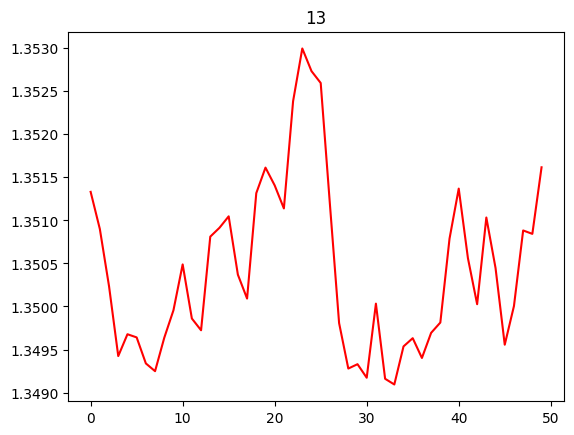

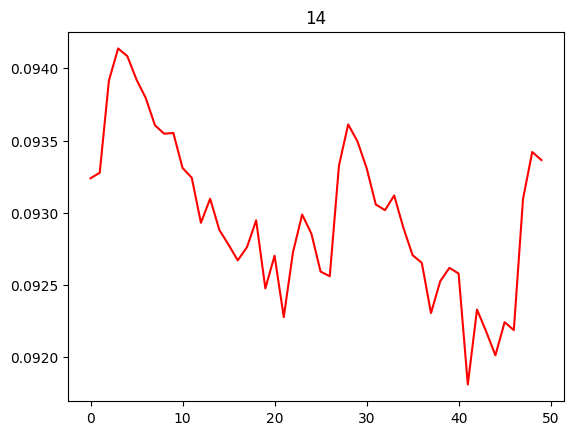

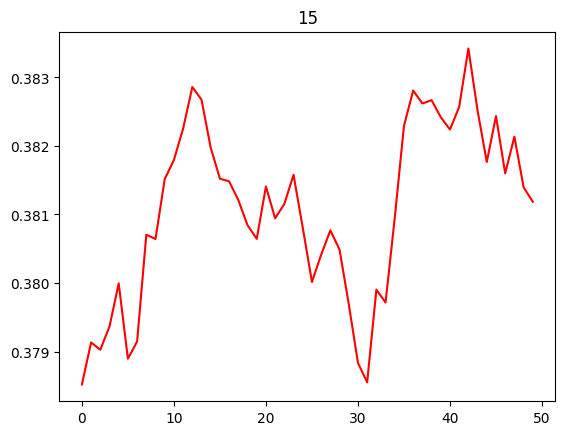

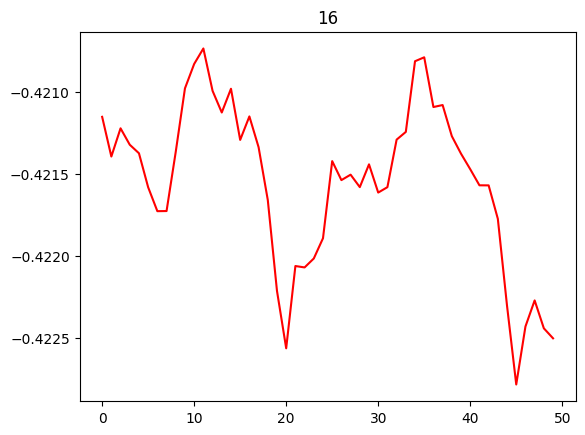

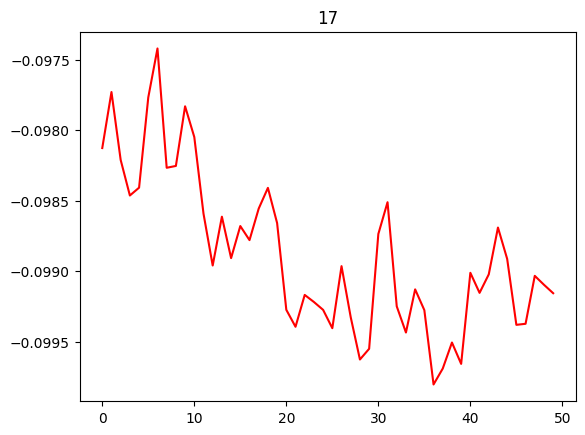

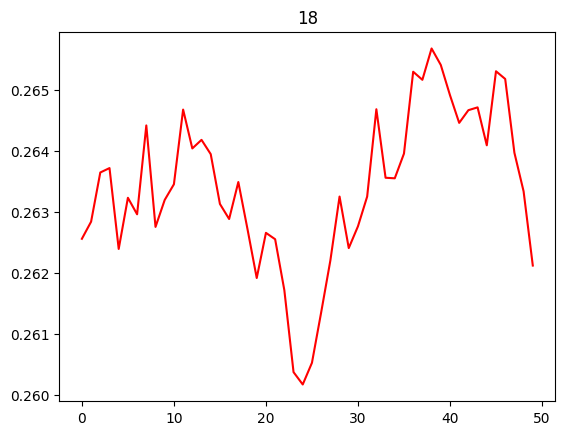

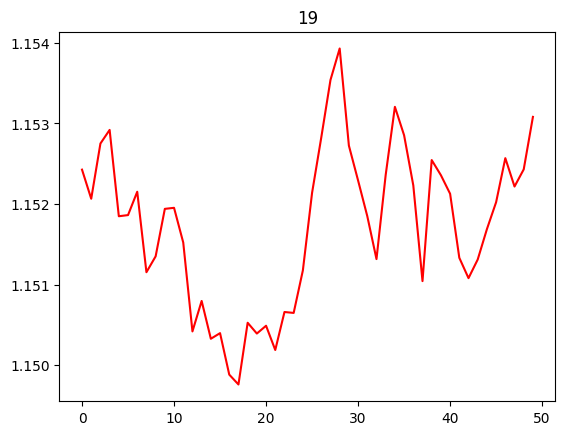

In [42]:
for i in range(20):
    plt.figure()
    plt.plot(kmeans.cluster_centers_[i, 0], color = 'red')
    plt.title(i)
    plt.show()


In [ ]:
count = 0
for a in range(len(labels)):
    if(labels[a] == 1):
        count+=1
        plt.title(f"{a}")
        plt.plot(data_close[a:a+20])
        plt.show()
    if(count == 30):
        break

In [12]:
lst = np.zeros(6)
for a in labels:
    lst[a] = lst[a]+1
print(lst)

[1154. 2380.  585.  948.  896. 2969.]


In [44]:
!pip install joblib  

In [48]:
from joblib import Parallel, delayed, dump, load
lst = np.array(lst)
X = lst.squeeze(axis=-1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled[:, :, np.newaxis] if X_scaled.ndim == 2 else X_scaled

kmeans = TimeSeriesKMeans(n_clusters=100, metric="dtw", random_state=42)

labels = kmeans.fit_predict(X_scaled)  

dump(kmeans, "kmeans_model.joblib")
dump(scaler, "scaler.joblib")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [49]:
kmeans_loaded = load("kmeans_model.joblib")
scaler_loaded = load("scaler.joblib")

(5727, 50, 1)
